# Title: Predicting Car Engine Failure Using Sensor Data

In [2]:
# Importing Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
# Importing data set
fp = r"D:\9. Self Projects\Car engine sensor data.csv"
df = pd.read_csv(fp)
df.head(3)

,Vehicle id,Engine temperature,Oil pressure,RPM,Vibration level,Battery voltage,Mileage,Engine failure
0,1051,105.23,42.71,2372,0.35,13.03,74619,1
1,1092,95.39,45.03,3407,0.49,13.44,38513,0
2,1014,79.63,45.31,2861,0.38,12.20,13749,0


### Data Pre-processing

In [8]:
df.dtypes

Vehicle id              int64
Engine temperature    float64
Oil pressure          float64
RPM                     int64
Vibration level       float64
Battery voltage       float64
Mileage                 int64
Engine failure          int64
dtype: object

In [10]:
df.isnull().sum()

Vehicle id            0
Engine temperature    0
Oil pressure          0
RPM                   0
Vibration level       0
Battery voltage       0
Mileage               0
Engine failure        0
dtype: int64

### Exploratory Data Analysis (EDA)

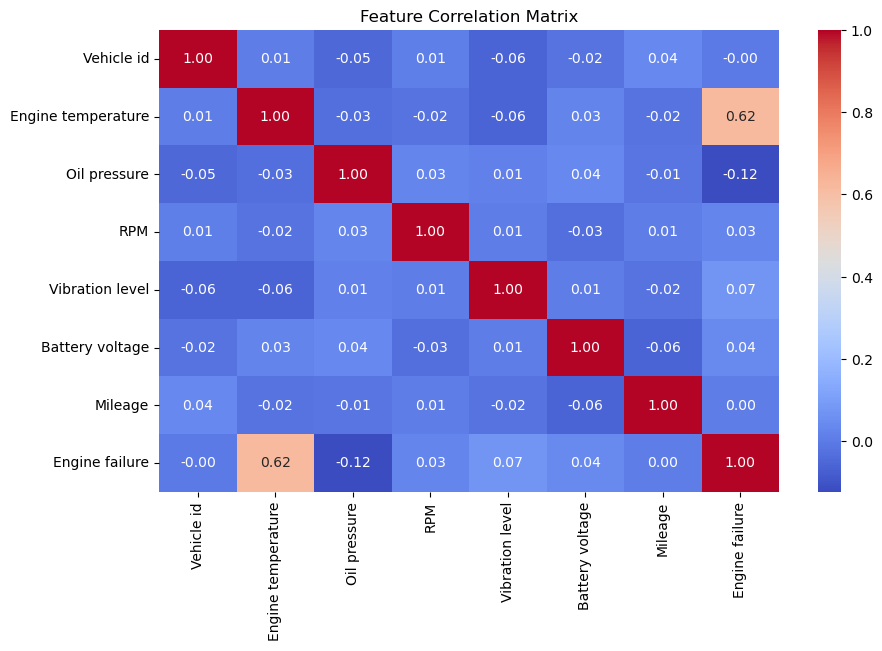

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [20]:
# Check correlation btw engine temperature and engine failure
corr1 = df['Engine temperature'].corr(df['Engine failure'])
print (f" Pearson Correlation is :", corr1.round(2))

 Pearson Correlation is : 0.62


In [24]:
# Grouped aggregation method
df.groupby('Engine failure')['Engine temperature'].mean()

Engine failure
0     87.488146
1    102.535362
Name: Engine temperature, dtype: float64

In [22]:
# Summary of the data (Univariate analysis)
df.describe().round(2)

,Vehicle id,Engine temperature,Oil pressure,RPM,Vibration level,Battery voltage,Mileage,Engine failure
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1049.13,90.60,35.10,2999.89,0.29,12.59,103424.62,0.21
std,29.57,9.92,4.88,510.96,0.10,0.49,56538.65,0.41
min,1000.00,61.04,19.90,1504.00,0.00,11.01,5037.00,0.00
25%,1023.00,83.93,31.79,2645.75,0.23,12.27,55992.50,0.00
50%,1050.00,90.56,35.00,2999.50,0.30,12.59,102902.00,0.00
75%,1074.00,96.96,38.42,3334.00,0.36,12.93,150804.50,0.00
max,1099.00,116.32,50.97,4963.00,0.62,14.16,199904.00,1.00


### Modeling

In [57]:
# Selecting variables
X = df[['Engine temperature', 'Oil pressure', 'RPM', 'Vibration level', 'Battery voltage']]    # independent variables
y = df['Mileage']  # dependent variable


In [58]:
# Spliting data for test and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

# 30% test and 70% training


In [59]:
# Linear Regression Analysis
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [60]:
# Make Predictions
y_pred = model.predict(X_test)


In [61]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

print("R² Score:", round(r2_score(y_test, y_pred), 5))
print("RMSE:", round(mean_squared_error(y_test, y_pred, squared=False),2))


R² Score: -0.01899
RMSE: 58264.94


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
# Use Classification algorythm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

a = df[['Engine temperature']]
b = df['Engine failure']

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(a_train, b_train)

b_pred = clf.predict(a_test)

print(classification_report(b_test, b_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       152
           1       1.00      0.75      0.86        48

    accuracy                           0.94       200
   macro avg       0.96      0.88      0.91       200
weighted avg       0.94      0.94      0.94       200



#### How to Use Your Model to Prevent Engine Failures

In [65]:
import joblib
joblib.dump(model, 'engine_failure_model.pkl')


['engine_failure_model.pkl']

In [66]:
model = joblib.load('engine_failure_model.pkl')


In [69]:
# Importing new data set
file = r"D:\9. Self Projects\BA project\new vehicle data.csv"
new_df = pd.read_csv(file)
X_new = new_df[['Engine temperature', 'Oil pressure', 'RPM', 'Vibration level', 'Battery voltage']]


In [74]:
from sklearn.linear_model import LogisticRegression

# Prepare your model (train it with your data)
model = LogisticRegression(max_iter=500)
n_train = df[['Engine temperature', 'Oil pressure', 'RPM', 'Vibration level', 'Battery voltage']]
k_train = df['Engine failure']
model.fit(n_train, k_train)

# Use the model to make predictions (probabilities)
probabilities = model.predict_proba(X_new)[:, 1]  # Get the probability of class 1 (failure)

# Set a threshold (e.g., 0.7 = high risk)
new_df['Failure Risk'] = probabilities
new_df['Alert'] = new_df['Failure Risk'] > 0.7

# Show vehicles at risk
at_risk = new_df[new_df['Alert'] == True]
print(at_risk[['Vehicle id', 'Failure Risk']])


    Vehicle id  Failure Risk
0        V0103      0.994765
1        V0180      0.999594
3        V0015      0.716345
4        V0107      0.944053
5        V0072      0.969159
..         ...           ...
993      V0109      0.996931
994      V0146      0.871426
995      V0111      0.996222
997      V0034      0.829535
998      V0111      0.999844

[684 rows x 2 columns]


In [ ]:
print(round(at_risk[['Vehicle id', 'Failure Risk']], 3))

### Extras

In [88]:
at_risk.head(3)

,Vehicle id,Engine temperature,Oil pressure,RPM,Vibration level,Battery voltage,Failure Risk,Alert
0,V0103,104.79,3.16,1198,0.48,12.21,0.994765,True
1,V0180,109.86,3.84,5429,0.26,11.98,0.999594,True
3,V0015,78.64,3.06,6826,1.19,13.17,0.716345,True


In [89]:
new_df.head(3)

,Vehicle id,Engine temperature,Oil pressure,RPM,Vibration level,Battery voltage,Failure Risk,Alert
0,V0103,104.79,3.16,1198,0.48,12.21,0.994765,True
1,V0180,109.86,3.84,5429,0.26,11.98,0.999594,True
2,V0093,74.77,3.70,2373,1.15,12.70,0.092000,False


In [87]:
at_risk.groupby('Failure Risk')['Engine temperature'].mean()

Failure Risk
0.701620     82.31
0.702497     86.39
0.704023     84.47
0.705619     83.97
0.706499     83.28
             ...  
0.999990    116.17
0.999990    119.46
0.999992    113.64
0.999994    117.61
0.999999    121.74
Name: Engine temperature, Length: 684, dtype: float64